In [1]:


%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty

from timeit import timeit
from numpy.random import rand, randint

L = 20           # lattice size is LxL
kB = 1.0         # Boltzman constant

J = 1.0          # coupling constant

# help( randint )

In [2]:
def energy( s ) : 
    """
        This is a tricky function to make without loops.
    """
    return -J * ( np.sum( s[0:L-1,:] * s[1:L,:] ) + np.sum( s[:,0:L-1] * s[:,1:L] ) )

def magnetization( s ) : 
    return np.sum( s ) / (L*L)

Text(0, 0.5, '$M$')

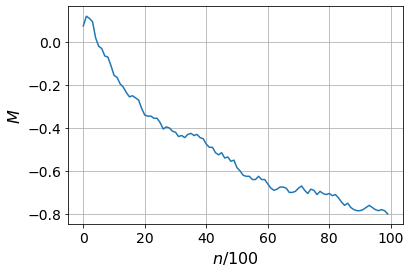

In [3]:
def createLattice( L ) : 
    """
        Creates an LxL lattice of random spins, $s_{ij} = \pm 1$.
    """
    return ( rand( L, L ) < 0.5 ) * 2 - 1  # more Boolean jujutsu

def ising( s, n, T ) : 
    """
        Runs the Metropolis algorithm $n$ times on the lattice $s_{ij}$.
    """
    M = np.zeros( n )         # used to store the magnetizations, $M(t)$
    E = np.zeros( n )         # used to store the energy, $E(t)$
    E[0] = energy( s )
    M[0] = magnetization( s )
    for t in range( 1, n ) :     # $t$ is our pseudo-time
        s, E[t] = metropolis( s, E[t-1] )
        M[t] = magnetization( s )
    return M
        
def metropolis( s, oldE ) : 
    # flip a random spin and calculate $dE$
    i, j = randint( L, size=2 )
    s[i,j] *= -1    # flip the ij spin
    E = energy( s )
    deltaE = E - oldE

    # these are the Metropolis tests 
    if deltaE < 0 : 
        # keep the flipped spin because it lowers the energy
        return s, E
    if rand() < np.exp( - deltaE / T ) : 
        # keep the spin flip because the random number is less than $e^{-dE/T}$
        return s, E

    # the spin flip is rejected 
    s[i,j] *= -1    # flip the ij spin back
    E = oldE        # and keep the old energy
    return s, E

T = 1.0           # temperature
n = 10000         # the number of Monte Carlo time steps
P = 100           # sorta like 1000 milliseconds in a second
s = createLattice( L )
M = ising( s, n, T )
plt.plot( M[::P] )  # only plot every P-th point
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$M$' )

Text(0, 0.5, '$M$')

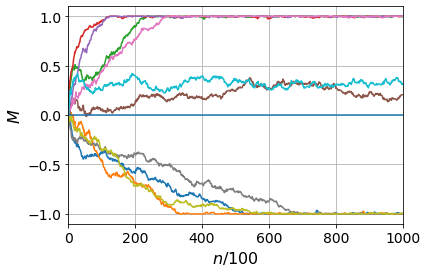

In [4]:
fig, ax = plt.subplots()

n = 100000               # increase the number of Monte Carlo time steps
for i in range( 10 ) :   # run the experiment 10 times
    s = createLattice( L )
    M = ising( s, n, T )
    ax.plot( M[::P] )    # only plot every P-th point

ax.plot( [0,n], [0,0] )

ax.set_xlim( [ 0, n/P ] )
ax.set_ylim( [-1.1, 1.1 ] )
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$M$' )

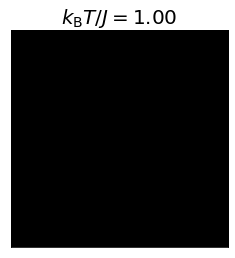

In [5]:
#Animating the Markov Chain progression through different spin lattice configurations:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation

def initIsing():
    global isingImage, spinLattice

    # this is the initial, random, t=0, state
    spinLattice = createLattice( L )
    
    isingImage = plt.imshow(spinLattice, interpolation='none', cmap='gray')
    return ( isingImage, )

def animateIsing(i) : 
    global isingImage, spinLattice 
    
    E = energy( spinLattice ) 
    for i in range( L*L ) : 
        spinLattice, E = metropolis( spinLattice, E ) 
    isingImage.set_data( spinLattice ) 
    return ( isingImage, ) 

# i'm using little m metropolis from above instead of this function
def Metropolis( s, i ) : 
    # this should update isingData for t=t[i] using the Metropolis algorithm
    isingData = rand( L, L )  < i / (2*n) + 0.5 
    return isingData 
    
def makeAnimation( T, n ) : 
    # set up the figure
    fig = plt.figure( )
    plt.subplot( )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.title( r'$k_{\rm B}T/J=%3.2f$' % T )
    # and create the animation
    anim = FuncAnimation( fig, animateIsing, init_func=initIsing,
                                frames=n, interval=250, blit=True )
    return anim

n = 100000
T = 1
anim = makeAnimation( T, n // (L*L) ) # because animateIsing() runs metropolis() L*L times

HTML( anim.to_html5_video() )


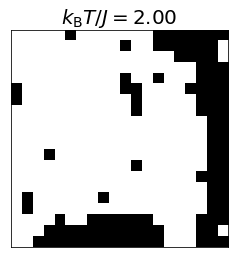

In [6]:
T = 2
anim = makeAnimation( T, n // (L*L) ) # because animateIsing() runs metropolis() L*L times
HTML( anim.to_html5_video() )

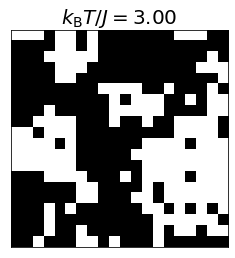

In [7]:
T = 3
anim = makeAnimation( T, n // (L*L) ) # because animateIsing() runs metropolis() L*L times
HTML( anim.to_html5_video() )